In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

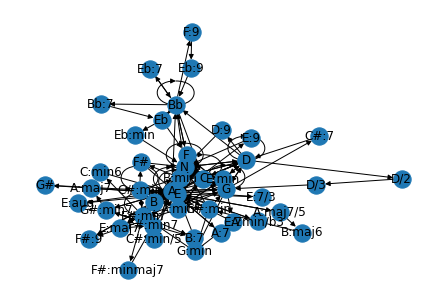

In [2]:
album01 = pd.read_csv('album_01_edges.csv')
G = nx.from_pandas_edgelist(album01, source="Source", target="Target", create_using=nx.DiGraph())
nx.draw(G, with_labels=True)

## Visuals

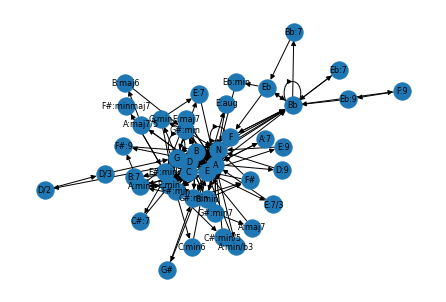

In [3]:
nx.draw(G,node_size=300,font_size=8,  with_labels=True) 

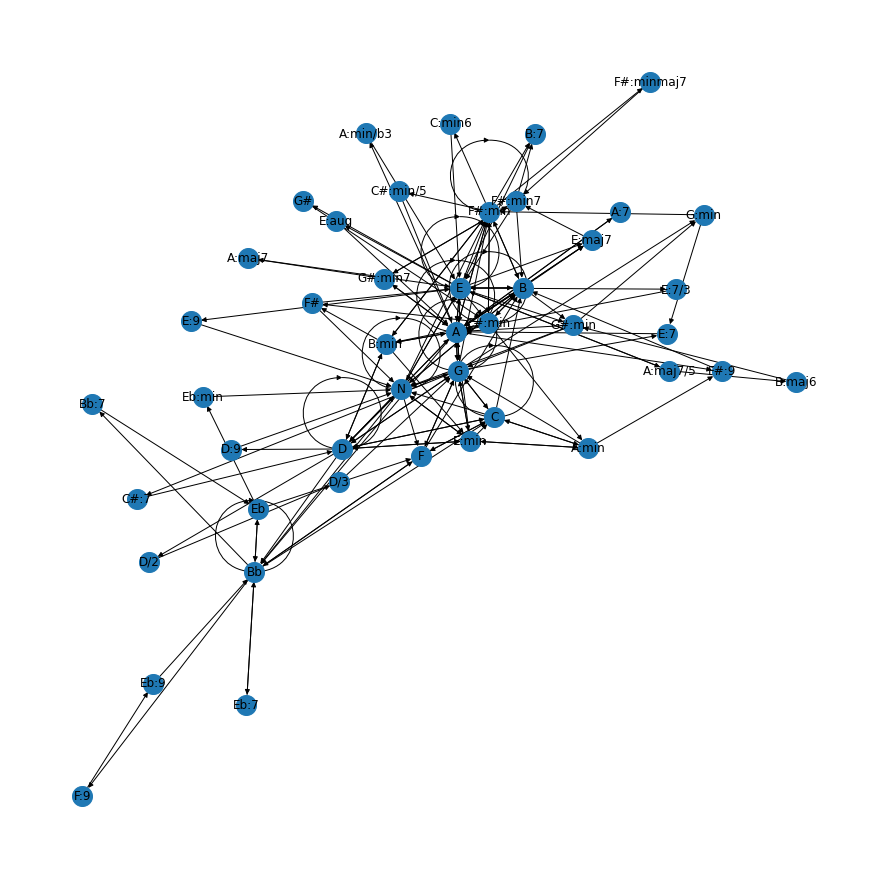

In [4]:
plt.figure(3,figsize=(12,12)) 
nx.draw(G, node_size=400,font_size=12,  with_labels=True)

## Triads

In [5]:
''' Conesus Motifs are: 
        021C
        111D
        201
        030C
        120C
        210
                    '''
    

' Conesus Motifs are: \n        021C\n        111D\n        201\n        030C\n        120C\n        210\n                    '

In [6]:
# Triad Consensus
nx.triadic_census(G)

{'003': 10100,
 '012': 2409,
 '102': 914,
 '021D': 67,
 '021U': 73,
 '021C': 173,
 '111D': 166,
 '111U': 142,
 '030T': 8,
 '030C': 7,
 '201': 58,
 '120D': 8,
 '120U': 7,
 '120C': 20,
 '210': 25,
 '300': 13}

In [7]:
import networkx as nx
import itertools

def _tricode(G, v, u, w):
    """Returns the integer code of the given triad.

    This is some fancy magic that comes from Batagelj and Mrvar's paper. It
    treats each edge joining a pair of `v`, `u`, and `w` as a bit in
    the binary representation of an integer.

    """
    combos = ((v, u, 1), (u, v, 2), (v, w, 4), (w, v, 8), (u, w, 16),
              (w, u, 32))
    return sum(x for u, v, x in combos if v in G[u])


# G = nx.DiGraph()
# G.add_nodes_from([1, 2, 3, 4, 5])
# G.add_edges_from([(1, 2), (2, 3), (2, 4), (4, 5)])

#: The integer codes representing each type of triad.
#: Triads that are the same up to symmetry have the same code.
TRICODES = (1, 2, 2, 3, 2, 4, 6, 8, 2, 6, 5, 7, 3, 8, 7, 11, 2, 6, 4, 8, 5, 9,
            9, 13, 6, 10, 9, 14, 7, 14, 12, 15, 2, 5, 6, 7, 6, 9, 10, 14, 4, 9,
            9, 12, 8, 13, 14, 15, 3, 7, 8, 11, 7, 12, 14, 15, 8, 14, 13, 15,
            11, 15, 15, 16)

#: The names of each type of triad. The order of the elements is
#: important: it corresponds to the tricodes given in :data:`TRICODES`.
TRIAD_NAMES = ('003', '012', '102', '021D', '021U', '021C', '111D', '111U',
               '030T', '030C', '201', '120D', '120U', '120C', '210', '300')

#: A dictionary mapping triad code to triad name.
TRICODE_TO_NAME = {i: TRIAD_NAMES[code - 1] for i, code in enumerate(TRICODES)}

triad_nodes = {name: set([]) for name in TRIAD_NAMES}
m = {v: i for i, v in enumerate(G)}
for v in G:
    vnbrs = set(G.pred[v]) | set(G.succ[v])
    for u in vnbrs:
        if m[u] > m[v]:
            unbrs = set(G.pred[u]) | set(G.succ[u])
            neighbors = (vnbrs | unbrs) - {u, v}
            not_neighbors = set(G.nodes()) - neighbors - {u, v}
            # Find dyadic triads
            for w in not_neighbors:
                if v in G[u] and u in G[v]:
                    triad_nodes['102'].add(tuple(sorted([u, v, w])))
                else:
                    triad_nodes['012'].add(tuple(sorted([u, v, w])))
            for w in neighbors:
                if m[u] < m[w] or (m[v] < m[w] < m[u] and
                                   v not in G.pred[w] and
                                   v not in G.succ[w]):
                    code = _tricode(G, v, u, w)
                    triad_nodes[TRICODE_TO_NAME[code]].add(
                        tuple(sorted([u, v, w])))
# find null triads
all_tuples = set()
for s in triad_nodes.values():
    all_tuples = all_tuples.union(s)
    
new = triad_nodes['210'] = set(itertools.combinations(G.nodes(), 3)).difference(all_tuples)

triad_nodes

{'003': set(),
 '012': {('B:7', 'Eb:9', 'F#:min7'),
  ('Bb:7', 'E:aug', 'Eb'),
  ('B:min', 'D/3', 'G'),
  ('C#:min', 'Eb', 'F#'),
  ('A:min/b3', 'E', 'Eb:7'),
  ('Bb:7', 'G', 'G#:min'),
  ('A', 'Bb', 'C:min6'),
  ('B', 'B:7', 'E:maj7'),
  ('C#:7', 'E:7/3', 'G'),
  ('B', 'Bb', 'D'),
  ('A:maj7/5', 'Bb', 'Bb:7'),
  ('C:min6', 'F#:min', 'G#:min'),
  ('B:7', 'F#:min7', 'N'),
  ('C:min6', 'E', 'Eb:min'),
  ('A:min/b3', 'Bb:7', 'Eb'),
  ('Bb:7', 'D/3', 'G'),
  ('Bb', 'Bb:7', 'E:7/3'),
  ('B:min', 'E:maj7', 'E:min'),
  ('F#:9', 'G#:min', 'G:min'),
  ('Bb', 'E:aug', 'N'),
  ('A:maj7', 'F#:min', 'N'),
  ('A:min/b3', 'G#:min', 'G:min'),
  ('C:min6', 'F#:min', 'F#:min7'),
  ('A:min', 'E', 'F#'),
  ('C', 'E', 'E:min'),
  ('D', 'D:9', 'F#:min'),
  ('A:maj7', 'B:7', 'F#:min7'),
  ('A:maj7', 'D', 'D/2'),
  ('B', 'Eb:min', 'F#:min7'),
  ('B', 'B:maj6', 'F#:min7'),
  ('B:min', 'E:min', 'F#:min7'),
  ('A', 'E:min', 'F'),
  ('C:min6', 'D:9', 'N'),
  ('A:min', 'C#:min', 'Eb'),
  ('C', 'D:9', 'E:min'),
  (